1. Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


2. Model evaluation

             Model  TOPSIS Score
2         DialoGPT      0.604044
0            GPT-2      0.578866
1       BlenderBot      0.457275
3  T5-Conversation      0.256608


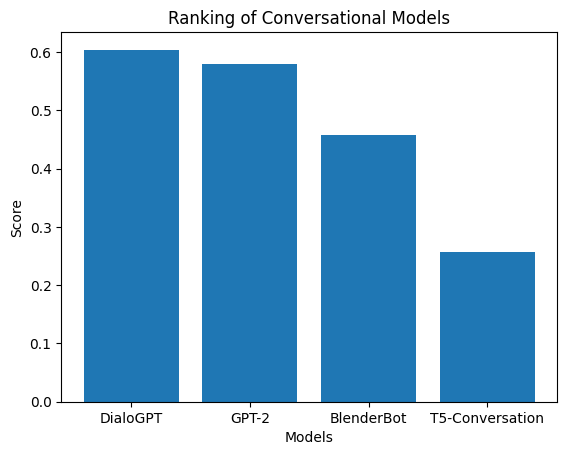

In [7]:
models=["GPT-2","BlenderBot","DialoGPT","T5-Conversation"]
decision_matrix = np.array([
    [0.62, 0.58, 4.1, 18, 120, 500],[0.70, 0.65, 4.5, 15, 150, 900], [0.68, 0.61, 4.3, 17, 110, 750], [0.64, 0.60, 4.0, 20, 130, 850]])
weights = np.array([0.2, 0.2, 0.2, 0.15, 0.15, 0.1])
benefit = np.array([True, True, True, False, False, False])
norm_matrix = decision_matrix / np.sqrt((decision_matrix**2).sum(axis=0))
weighted_matrix = norm_matrix * weights
ideal_best = np.zeros(weighted_matrix.shape[1])
ideal_worst = np.zeros(weighted_matrix.shape[1])
for i in range(weighted_matrix.shape[1]):
    if benefit[i]:
        ideal_best[i] = np.max(weighted_matrix[:, i])
        ideal_worst[i] = np.min(weighted_matrix[:, i])
    else:
        ideal_best[i] = np.min(weighted_matrix[:, i])
        ideal_worst[i] = np.max(weighted_matrix[:, i])
distance_best = np.sqrt(((weighted_matrix - ideal_best)**2).sum(axis=1))
distance_worst = np.sqrt(((weighted_matrix - ideal_worst)**2).sum(axis=1))
scores = distance_worst / (distance_best + distance_worst)
results = pd.DataFrame({"Model": models,"TOPSIS Score": scores})
results = results.sort_values(by="TOPSIS Score", ascending=False)
print(results)
plt.figure()
plt.bar(results["Model"], results["TOPSIS Score"])
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Ranking of Conversational Models")
plt.show()